# Proyecto 12 - Pronósticos y predicciones



# Introducción

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.  

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.
En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.  
Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

# Contenido

* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Diccionario de Datos](#diccionario)
* [Inicialización](#inicio)
* [Análisis exploratorio de datos (EDA)](#eda)
* [Construir un modelo para predecir la cancelación de usuarios](#modelo)
* [Creación de clústeres de usuarios/as](#cluster)
* [Conclusiones y Recomendaciones](#end)

# Objetivos <a id='objetivos'></a>

• Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.  
• Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.  
• Analizar los factores que más impactan la pérdida.  
• Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente.  

# Etapas <a id='etapas'></a>  

1. Importar las librerias necesarias.  
2. Descripción de los datos, leer y guardar el dataset con Pandas.  
3. Procesamiento de datos, preparar los datos para sean analizados.  
4. Análisis de datos, construir un modelo para predecir la cancelación de usuarios.  
5. Creación de clústeres de los/las usuarios/as.  
6. Conclusiones generales y recomendaciones.  

# Diccionario de Datos <a id='diccionario'></a>  

El dataset incluye los siguientes campos:  

`Churn` — la cancelación para el mes en cuestión  

Campos de dataset actuales:  
Datos del usuario del mes anterior  
`gender` - genero de la persona.  
`Near_Location` — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.  
`Partner` — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).  
`Promo_friends` — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).  
`Phone` — si el/la usuario/a aportó el número de teléfono.  
`Age` - edad de los/las usuarios/as.  
`Lifetime` — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio. 

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:  
`Contract_period` — 1 mes, 3 meses, 6 meses o 1 año.  
`Month_to_end_contract` — los meses que faltan hasta que expire el contrato.  
`Group_visits` — si el/la usuario/a participa en sesiones grupales.  
`Avg_class_frequency_total` — frecuencia media de visitas por semana a lo largo de la vida del cliente.  
`Avg_class_frequency_current_month` — frecuencia media de visitas por semana durante el mes en curso.  
`Avg_additional_charges_total` — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.  


# Inicialización <a id='inicio'></a>

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Carga del archivo de datos
df_gym = pd.read_csv('files/datasets/gym_churn_us.csv')

# Análisis exploratorio de datos (EDA) <a id='eda'></a>

In [3]:
# tamaño e información general/resumida sobre el DataFrame del gym
print(f'Tamaño del DataFrame:\n{df_gym.shape}')
print()
df_gym.info()

Tamaño del DataFrame:
(4000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_to

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**
 
El tamaño del DataFrame es de 4000 filas y 14 columnas (total de 56000 datos), ninguna columna o característica tiene valores ausentes y los tipos de datos son enteros y punto flotante, no hay datos categóricos. 

 
</span>
 
</div>

In [4]:
# se guardan los nombres de las columnas en una lista
name_columns = df_gym.columns

#se define una nueva lista vacia para guardar los nuevos nombre de las columnas en minúscula
lower_name_columns = []

# se crea un bucle for para cambiar dar formato en minúscula a los nombres
for name in name_columns:
    lower_name = name.lower()
    lower_name_columns.append(lower_name)
    
print(lower_name_columns)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


In [5]:
# Se asignan los nuevos nombres de columna
df_gym.columns = lower_name_columns

In [6]:
# valores promedio y la desviación estándar, se usa el método describe()
df_gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
De la columna `contract_period` en promedio alrdedor de 5 meses es el periodo de contratación de la membresía. La `edad` promedio es de 29 años, para que finalice la membresía (`month_to_end_contract	`) de los/las usuarios/as en promedio son 4.3 meses. El tiempo en meses desde que el/la usuario/a llegó por primera vez al gimnasio (`lifetime`) en promedio es de 3.7 meses. La frecuencia media de visitas por semana a lo largo de la vida del cliente (`avg_class_frequency_total`) son 1.8 (alrdedor de 2 visitas) y la frecuencia media de visitas por semana durante el mes en curso (`avg_class_frequency_current_month`) es de 1.7 (2 visitas aproximadamente). Y la cantidad total de dinero gastado en otros servicios del gimnasio (`avg_additional_charges_total`) en promedio es de 146.9.  

 
</span>
 
</div>

In [7]:
# valores medios de las características en para las personas que se fueron (cancelación = 1) y las que se quedaron (valor 0) 
# de la columna 'churn', se emplea el método agg() para calcular el promedio ('mean')
df_gym.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
Para los/las usuarios/as que cancelaron en promedio la membresía contratada fue de 1.7 meses (se podría decir que 2 meses) y la edad promedio fue de 26.9 años (alrededor de 27 años). La cantidad total de dinero gastado en otros servicios del gimnasio fue menor para los/las usuarias que cancelaron 115, mientras que los que no cancelaron fue de 158.4. Para que finalizara la membresía para usuarios/as faltaba en promedio 1.6 meses y el tiempo en meses desde que el/la usuario/a llegó por primera vez al gimnasio fue de 0.99, que se podría decir que es 1 mes. Y la y  frecuencia media de visitas a la semana es de aproximadamente 1, a diferencia de los/las usuarios/as que no cancelaron es el doble de visitas.

 
</span>
 
</div>

In [8]:
# se filtran los datos para usuarios/as que cancelaron
df_cancel = df_gym[df_gym['churn'] == 1]
df_cancel.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


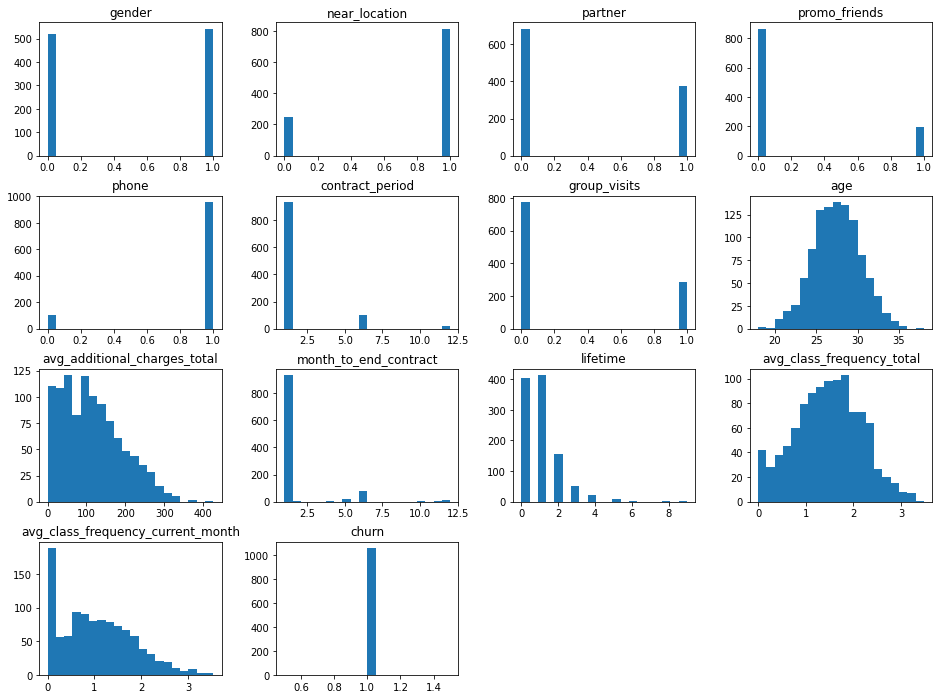

In [9]:
# histograma de barras y distribuciones de características para aquellas personas que se fueron (cancelación)
df_cancel.hist(bins= 20, figsize=(16, 12), grid= False)

plt.show()

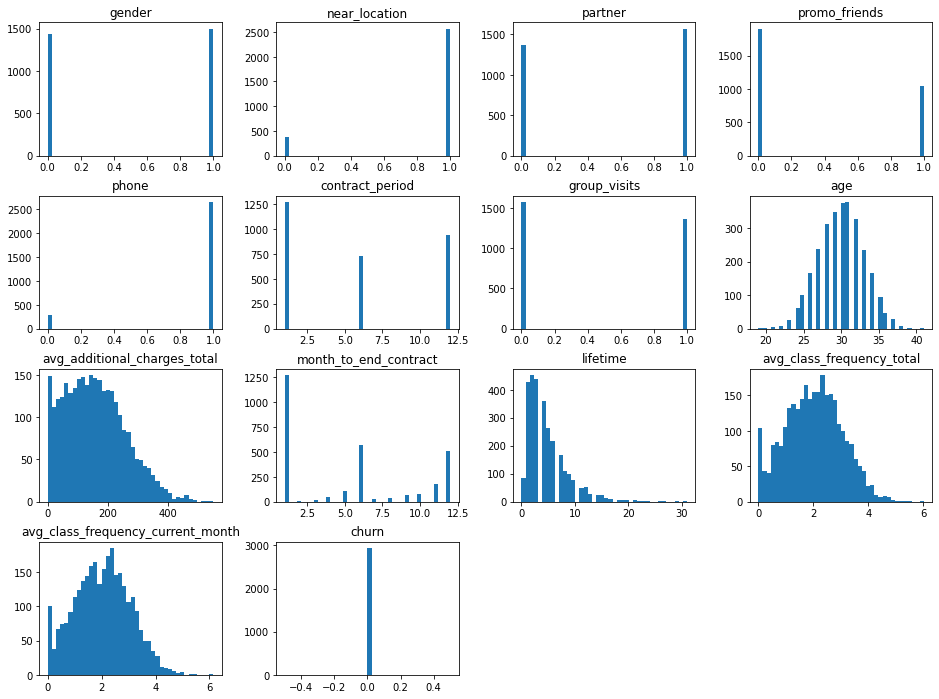

In [10]:
# se filtran los datos para los/las usuarios/as que no cancelaron
df_no_cancel = df_gym[df_gym['churn'] == 0]

# histogramas de barras y distribuciones de características para aquellas personas que no se fueron (no cancelaron)
df_no_cancel.hist(bins= 40, figsize=(16, 12), grid= False)

plt.show()

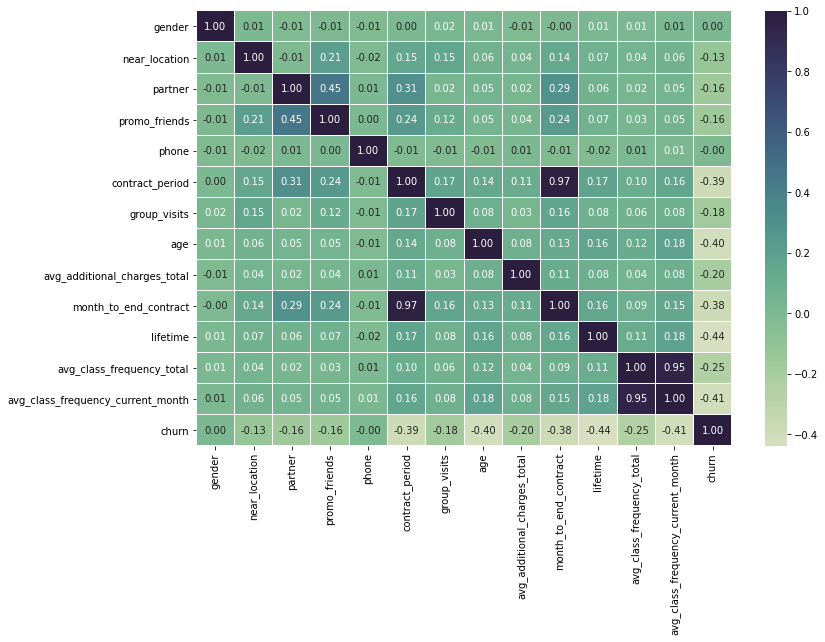

In [11]:
# se crea una matriz de correlación
cm = df_gym.corr() 

# se grafica con seaborn
plt.figure(figsize=(12, 8))

sns.heatmap(cm, 
            annot= True, 
            fmt=".2f", 
            cmap= sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), 
            linewidth=.01
           )

plt.show()

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
Las características que tienen una correlación y es negativa con la variable objetivo (columna `churn`) son todas a excepción de `gender` y `phone`.

Por otra parte, hay características que se correlacionan fuertemente entre sí, las cuáles son: `contract_period` con `month_to_end_contract` y `avg_class_frequency_current_month` con `avg_class_frequency_total`. Lo anterior es importante tener en cuenta, ya que la correlación mutua no es deseable para los modelos lineales.  

 
</span>
 
</div>

# Construir un modelo para predecir la cancelación de usuarios <a id='modelo'></a>

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">  
    
Se crea un modelo de clasificación binaria para los/las clientes donde la característica objetivo es si se fue el usuario o la usuaria el mes siguiente (columna `churn`). Por tanto, se usará la **regresión logística** para resolver la tarea de clasificación binaria, donde 1 es igual a se fue el/la cliente y 0 no se fue.  
    
</span>
 
</div>

In [12]:
# se divide los datos en características (la matriz X) y una variable objetivo (y)
X = df_gym.drop('churn', axis = 1)
y = df_gym['churn']

In [13]:
# se dvide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()
# los datos en conjuntos de entrenamiento y validación se dividen en una proporción de 80% a 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# se estandarizan los datos con StandardScaler()
scaler = StandardScaler()
# se entrena el scaler en el conjunto de entrenamiento utilizando el método fit()
scaler.fit(X_train)

# se estandariza el conjunto de entrenamiento utilizando el método transform scaler
X_train_st = scaler.transform(X_train) 
X_test_st = scaler.transform(X_test) 

In [15]:
# se define el algoritmo para el modelo de regresión logística
lr_model = LogisticRegression(random_state=0)

# se entrena el modelo con fit()
lr_model.fit(X_train_st, y_train)

# se utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [16]:
# ahora se define el algoritmo para el  modelo de random forest RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# se entrena el modelo de random forest
rf_model.fit(X_train_st, y_train)

# se utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [17]:
# se define la función que genera y muestra las métricas
def print_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}") 
    print(f"Precision: {precision_score(y_true, y_pred):.2f}") 
    print(f"Recall: {recall_score(y_true, y_pred):.2f}") 
    print(f"ROC_AUC: {roc_auc_score(y_true, y_proba):.2f}") 
    print('===============================================')

In [18]:
print_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')
print_metrics(y_test, rf_predictions, rf_probabilities , title='Métricas de Bosque Aleatorio:')

Métricas de regresión logística:
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
ROC_AUC: 0.97
Métricas de Bosque Aleatorio:
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
ROC_AUC: 0.97


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
Las métricas de clasificación de precisión y ROC_AUC no son diferentes en ambos modelos, mientras que, las métricas de precisión y recall son ligeramente mayores en el modelo de regresión logística, con base en lo anterior se puede decir que el modelo de regresión logística dio mejores resultados.  
 
</span>
 
</div>

In [19]:
# ahora se hace un análisis de la importancia de las características
# se hace con coeficientes de la regresión, se almacenan en el atributo .coef_ del modelo entrenado de la regresión logística
feature_weights = lr_model.coef_
feature_weights

array([[-0.01307937, -0.07564435, -0.0815124 , -0.27567138,  0.00490768,
        -0.71909489, -0.39345268, -1.09143144, -0.55216408, -0.53402553,
        -3.84628138,  3.29978832, -4.45423124]])

In [20]:
# se hace una lista del array o de los coeficientes de las características, se crea una lista vacia
list_feature_weights= []

# se crea un bucle para agregar cada valor a la lista list_feature_weights
for i in abs(lr_model.coef_): # se toman en cuenta los valores absolutos de los coeficientes, por eso se usa abs()
    for j in i:
        list_feature_weights.append(j)

list_feature_weights

[0.01307937201140834,
 0.07564434601720794,
 0.08151239669750868,
 0.27567138034891603,
 0.0049076801730761396,
 0.7190948877610294,
 0.39345268202828954,
 1.091431440977003,
 0.5521640847600711,
 0.5340255256448188,
 3.8462813801288553,
 3.2997883193237483,
 4.454231242848059]

In [21]:
# se crea un DataFrame con los nombres de las características y la importancia
features_df_lr = pd.DataFrame(data ={'feature': X.columns, 'importance': list_feature_weights})
features_df_lr.sort_values('importance', ascending = False)

,feature,importance
12,avg_class_frequency_current_month,4.454231
10,lifetime,3.846281
11,avg_class_frequency_total,3.299788
7,age,1.091431
5,contract_period,0.719095
8,avg_additional_charges_total,0.552164
9,month_to_end_contract,0.534026
6,group_visits,0.393453
3,promo_friends,0.275671
2,partner,0.081512


In [22]:
# se hace lo mismo para el modelo de bosque aleatorio
# se crea un DataFrame, pero la importancia de las características se almacenan en .feature_importances_
features_df_rf = pd.DataFrame(data ={'feature': X.columns, 'importance': rf_model.feature_importances_})
features_df_rf.sort_values('importance', ascending = False)

,feature,importance
10,lifetime,0.276499
12,avg_class_frequency_current_month,0.180170
11,avg_class_frequency_total,0.129883
7,age,0.119129
8,avg_additional_charges_total,0.091473
9,month_to_end_contract,0.068855
5,contract_period,0.065964
6,group_visits,0.015652
0,gender,0.012425
2,partner,0.012285


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
Las 5 características más importantes, para el modelo de la **regresión logística** son: `avg_class_frequency_current_month`, `lifetime`, `avg_class_frequency_total`, `age` y `contract_period`. Mientras que, para el modelo de **bosque aleatorio** son: `lifetime`, `avg_class_frequency_current_month`, `avg_class_frequency_total`, `age` y `avg_additional_charges_total`.  
 
</span>
 
</div>

# Creación de clústeres de usuarios/as <a id='cluster'></a>

In [23]:
# se estandarizan los datos con StandardScaler() y fit_transform()
sc = StandardScaler()
x_sc = sc.fit_transform(df_gym)

In [24]:
# se usa la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y 
# trazar un dendrograma
# en la variable linked se almacena la tabla con los haces de objetos vinculados
linked = linkage(x_sc, method = 'ward')

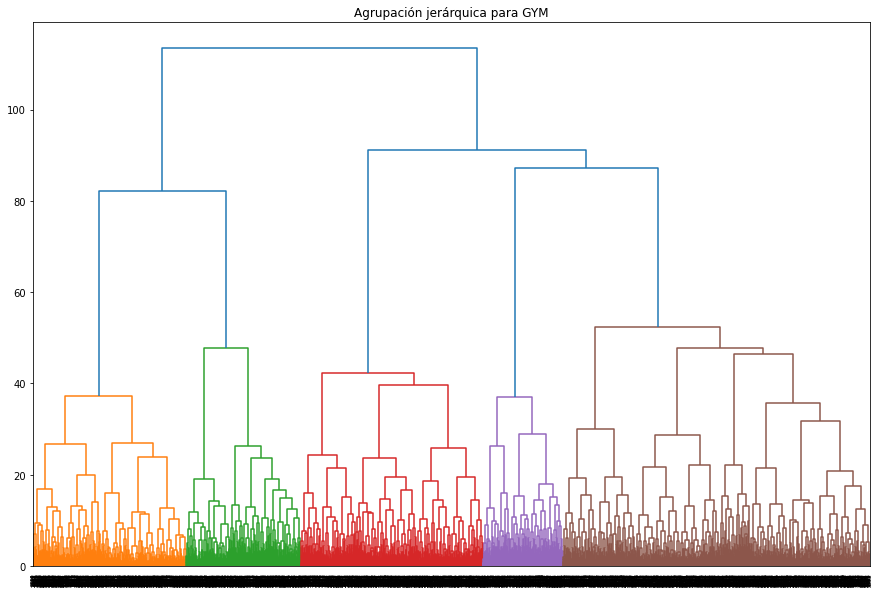

In [25]:
# se realiza el dendograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
El número de clústeres sugerido es de 5, corresponde a los cinco colores diferentes del gráfico.  
Ahora se procede a realizar el algoritmo K-means.
 
</span>
 
</div>

In [26]:
# se define el modelo k_means con 5 clústeres, con base en los resultados del dendograma
km = KMeans(n_clusters= 5)

# aplicar el algoritmo a los datos y formar un vector de clúster
labels = km.fit_predict(x_sc)

In [27]:
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
df_gym['cluster_km'] = labels

In [28]:
# valores medios de característica para los clústeres
df_gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
1,0.476301,0.825434,0.447399,0.253179,1.000000,2.647399,0.381503,30.017341,153.490037,2.464740,4.669364,1.183720,1.182760,0.001156
2,0.503106,0.938923,0.768116,0.564182,1.000000,11.173913,0.557971,29.899586,161.514913,10.223602,4.704969,2.006679,2.001081,0.015528
3,0.549645,0.842790,0.374704,0.216312,0.998818,2.750591,0.442080,29.977541,160.245842,2.528369,4.593381,2.933126,2.939963,0.007092
4,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observación:**  
El cluster 3, tiene la mayor cantidad de usuarios/as que cancelaron o se fueron, ya que el promedio de la columna `churn` es muy cercano a 1, 0.928. Y el género de las personas no está inclinado en ninguno de los clústeres ya que sus promedios oscilan alrededor de 0.5.   
 
</span>
 
</div>

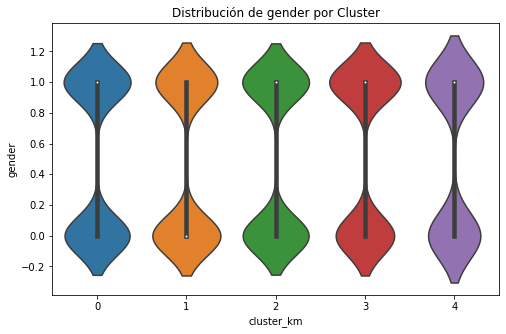

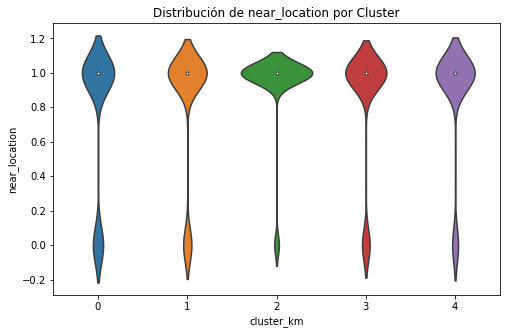

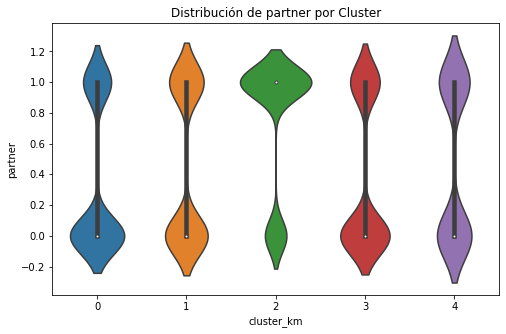

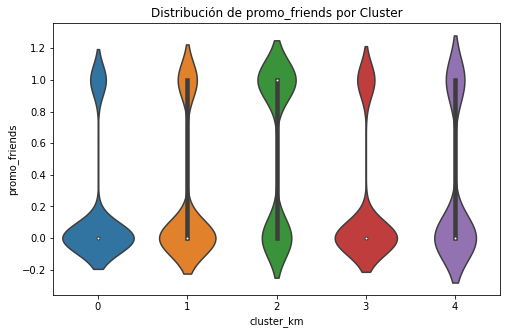

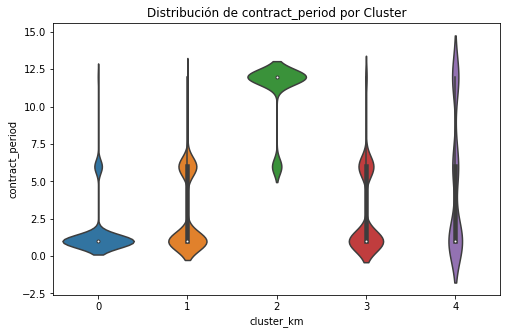

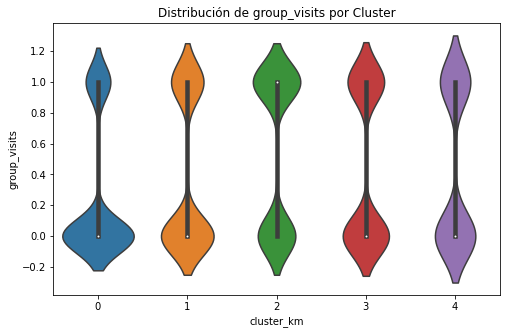

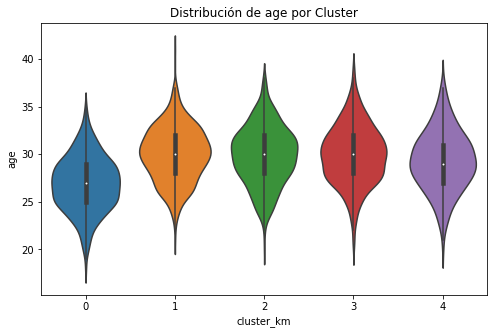

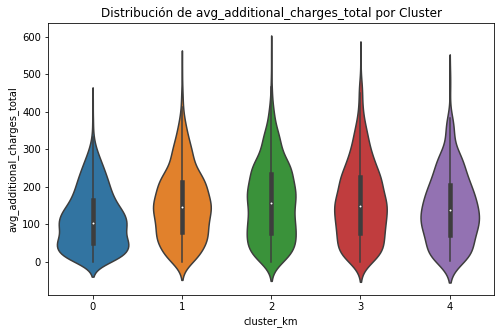

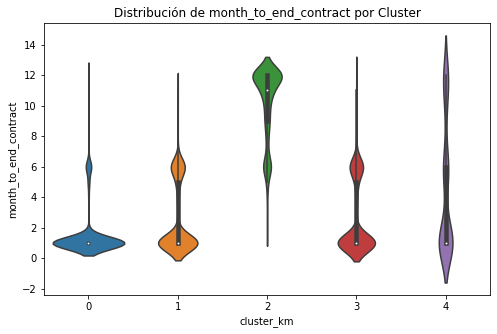

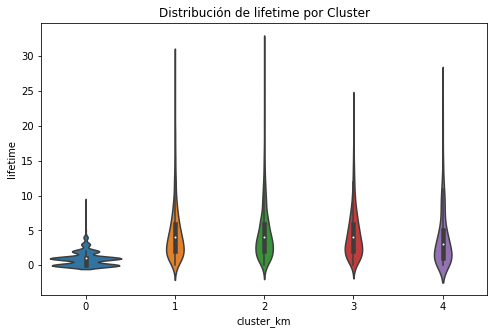

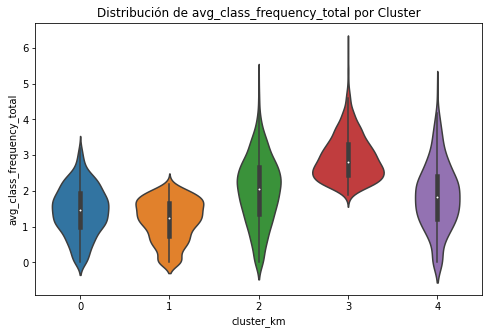

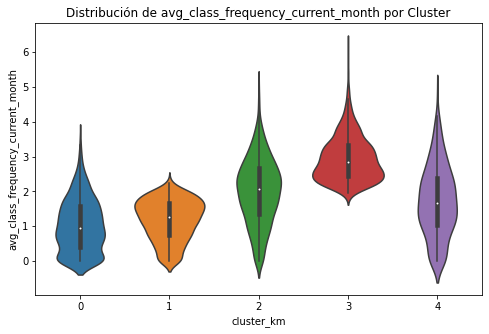

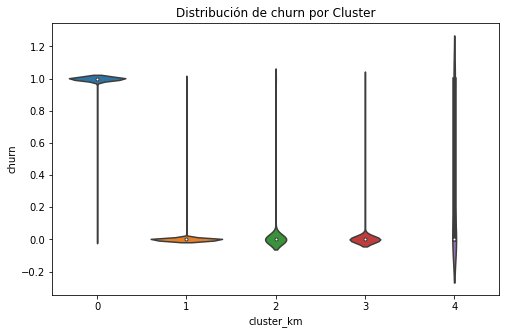

In [29]:
# Ahora se trazan distribuciones de características para los clústeres
# se hace con gráficos de violin, los cuales  combinan la información de box plots y gráficos de densidad, que
# proporcionan una visión más completa de la distribución de los datos en cada cluster
for feature in df_gym.drop(columns= ['phone', 'cluster_km']).columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='cluster_km', y=feature, data=df_gym, palette='tab10')
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observaciones:**  
Las distribuciones de las características para cada cluster es igual en algunas, sin embargo, en otras características son deferentes, en este caso son: `partner`, `near_location`, `promo_friends`, `contract_period`, group_visits, `month_to_end_contract`, `lifetime`, `avg_class_frequency_total`, `avg_class_frequency_current_month` y `churn`.  
    
**Nota:**  
Cada vez que se corra el código de este notebook, las distribuciones de las características de los clúster podrían ser diferentes, o bien, similares a lo que se escribió anteriormente.
 
</span>
 
</div>

In [30]:
# se calcula la tasa de cancelación para cada cluster
cluster_cancel_rt = df_gym.groupby('cluster_km')[['churn']].sum() / df_gym.groupby('cluster_km')['churn'].sum().sum() * 100
# se cambia el nombre de la columna
cluster_cancel_rt.rename(columns={'churn': 'cancel_rate'}, inplace=True)

cluster_cancel_rt

,cancel_rate
cluster_km,
0,88.501414
1,0.094251
2,1.413761
3,0.565504
4,9.425071


<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
**Observaciones:**  
Los clústeres difieren en términos de tasa de cancelación, los clúster 0 y 4 son más propensos a cancelar, sus tasas de cancelación son de 88.5 % y 9.42 %, respectivamente. Mientras que, los clúster más leales son el 1 y 3, con una tasa de cancelación de 0.09 % y 0.56 %, respectivamente.  
    
**Nota:**  
Cada vez que se corra el código de este notebook, los clúster más propensos a cancelar y los que son más leales van a ser diferentes.  
 
</span>
 
</div>

# Conclusiones y Recomendaciones <a id='end'></a>

<div style="background-color: lightyellow; padding: 10px;">
     
<span style="color: darkblue;">
 
• Los usuarios/as que cancelaron tuvieron una duración promedio de membresía de alrededor de 1.7 meses, lo cual indica que la mayoría canceló después de un período relativamente corto.  
    
• Usuarios/as que cancelaron gastaron menos en otros servicios del gimnasio a diferencia con los/las que no cancelaron. Esto puede sugerir que los servicios extras pueden ser un factor que influye en la decisión de los/las usuarios/as de cancelar.  
    
• En promedio, a los/las usuarios/as que cancelaron les faltaba 1.6 meses para finalizar su membresía. Esto podría indicar que algunos/as usuarios/as decidieron cancelar antes de que finalizara de forma natural su membresía.  
    
• El tiempo promedio en meses desde que se dio la primera visita al gimnasio para los/las usuarios/as que cancelaron fue de aproximadamente 1 meses. Lo cual puede sugerir que algunos/as usuarios/as cancelaron pronto después de unirse al gimnasio.  
    
• La frecuencia media de visitas semanales para los usuarios que cancelaron fue de alrededor 1, mientras que para los que no cancelaron fue el doble.  
    
• Las métricas de precisión y ROC_AUC son similares en ambos modelos, es posible que el rendimiento general no sea muy diferente entre ambos modelos.  
    
• Para la elección del Mejor Modelo, tomando en cuenta que las métricas de precisión y recall son ligeramente mejores en el modelo de regresión logística, se puede sugerir que, en términos generales, este modelo parece ser mejor que el modelo de bosque aleatorio. No obstante, se recomienda realizar una evaluación más profunda y considerar otros factores del problema antes de tomar una decisión final sobre la selección del modelo.  
    
• Para la importancia de las características algunas  son comunes entre ambos modelos (como `avg_class_frequency_current_month`, `lifetime`, `avg_class_frequency_total` y `age`), el orden de importancia puede variar. Si se desea mejorar la retención de clientes en el gimnasio, las características más importantes pueden ofrecer información sobre los factores que influyen en la retención y enfocar esfuerzos de mejora y publicidad hacias esas características.  

 
</span>
 
</div>